In [1]:
from IPython.display import display
import pandas as pd

#print("Enter Your Date YYYY-MM-DD ")
mydate = '2021-04-08'
mydate = pd.to_datetime(mydate)

In [28]:
# get the latest margin file (pdf) from the web

import pandas as pd
import time
import tabula.io
import pandas as pd
import os
from datetime import date, timedelta
import yfinance as yf

pd.set_option('mode.chained_assignment',None)    # turn off chain error warning since I use loc function properly
pd.options.display.float_format = '{:,.2f}'.format

os.chdir(r"C:\Users\r.christianto\MyPython\Yahoo")
myfile = 'https://www.westpac.com.au/content/dam/public/wbc/documents/pdf/pb/1999030/WOIL_Acceptable_Securities_List.pdf'

df2 = tabula.io.read_pdf(myfile,pages='all')
frames = [df2[0],df2[1],df2[2],df2[3]]
consol = pd.concat(frames)
consol = consol.drop(['Unnamed: 0','Unnamed: 1','APIR Code Fund Name.1','APIR Code Fund Name'],axis=1)
consol = consol.dropna(subset=['ASX Code','ASX Code.1'])

consol1 = consol[['ASX Code','Security Name','LVR']]
consol2 = consol[['ASX Code.1','Security Name.1','LVR.1']]
consol2.columns = ['ASX Code','Security Name','LVR']
mycsv = pd.concat([consol1,consol2])
mycsv.to_csv('Margin.csv',index=False)


In [53]:

import pandas as pd
import datetime
import yfinance as yf

############ create a list/string of codes to download from yahoo finance ##############

mycsv = pd.read_csv('Margin.csv')
mycsv = mycsv[['ASX Code','Security Name','LVR']]
mycsv = mycsv.rename(columns = {'ASX Code':'Code'})


mystock = mycsv['Code']
# add some more stocks not in the margin list
#mystock = mystock.append(pd.Series(['^AORD','^DJI','^FTSE','CL=F']),ignore_index=True)

# convert to string to make it better with dowloanding tracker
mystring = ''
mylist = []
for i in mystock:
    if i in ['^AORD','^DJI','^FTSE','CL=F']:     # indexes no need to add .AX
        mystring = mystring + ' ' + i
        mylist.append(i)
    elif i in ['TGG','CCL','BIN','JHC','AHY','RDC','VOC','ALF','MLT','AQR','MHH']:
        # EXCLUDE THE CODES ABOVE SINCE THEY HAVE BEEN DELISTED
        continue
    else:
        mystring = mystring + ' ' + i + '.AX'
        mylist.append(i+'.AX')



############ pick up data from yahoo finance (last 120 days) #############################

start =  datetime.date.today() + datetime.timedelta(days=-120)
end = datetime.date.today() + datetime.timedelta(days=1)
data = yf.download(mystring, start=start, end=end, group_by="ticker")



######################## create dataframe and export to csv ###############################

mycol = []
mytbl = pd.DataFrame(columns=mycol)

# looping through the list to modify table

for i in mylist:
    df = data[i]     # new one using Yfinance
    df['Code'] = i
    mytbl = mytbl.append(df)

# export csv
mytbl.to_csv("Yahoo.csv")




[*********************100%***********************]  473 of 473 completed


In [27]:
import yfinance as yf

data = yf.download(['IAG.AX'], start='2018-04-01', end='2022-04-30', group_by="ticker")


[*********************100%***********************]  1 of 1 completed


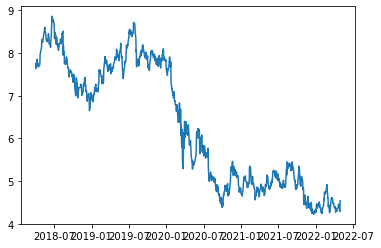

In [28]:
import matplotlib.pyplot as plt

plt.plot(data['Close'])

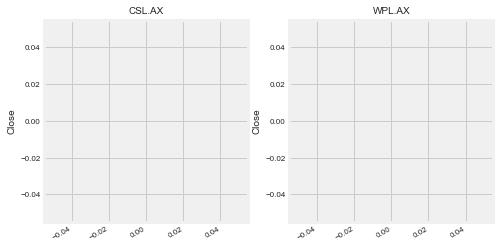

In [54]:
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#list = pd.read_csv('mylist.csv')['Mylist'].tolist()
list = ['CSL.AX','WPL.AX']
mytbl = df

plt.figure(figsize=(15, 19))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, desc in enumerate(list):
    #series = mytbl[mytbl['Code']==list[i]]['Close']    # change the column to vol etc.... 
    #date = mytbl[mytbl['Code']==list[i]]['Date'] 
    plt.subplot(4,4,i+1)
    mytbl[mytbl['Code']==list[i]]['Close'].plot(linewidth = 1)  
    plt.ylabel('Close', fontsize = 10)
    plt.xlabel(None)
    plt.title(f"{list[i]}", fontsize = 10)
    plt.yticks(fontsize = 8)
    plt.xticks(fontsize = 8)

In [55]:
mytbl[mytbl['Code']=='CSL.AX']

,Open,High,Low,Close,Adj Close,Volume,Code
Date,,,,,,,


In [57]:
mytbl.groupby('Code').count()

,Open,High,Low,Close,Adj Close,Volume
Code,,,,,,
YMAX.AX,81,81,81,81,81,81


In [2]:


############ create a list/string of codes to download from yahoo finance ##############

mycsv = pd.read_csv('Margin.csv')
mycsv = mycsv[['ASX Code','Security Name','LVR']]
mycsv = mycsv.rename(columns = {'ASX Code':'Code'})


mystock = mycsv['Code']
# add some more stocks not in the margin list
mystock = mystock.append(pd.Series(['^AORD','^DJI','^FTSE','CL=F']),ignore_index=True)

# convert to string to make it better with dowloanding tracker
mystring = ''
mylist = []
for i in mystock:
    if i in ['^AORD','^DJI','^FTSE','CL=F']:     # indexes no need to add .AX
        mystring = mystring + ' ' + i
        mylist.append(i)
    elif i in ['TGG','CCL','BIN','JHC','AHY','RDC','VOC','ALF','MLT','AQR','MHH']:
        # EXCLUDE THE CODES ABOVE SINCE THEY HAVE BEEN DELISTED
        continue
    else:
        mystring = mystring + ' ' + i + '.AX'
        mylist.append(i+'.AX')

In [3]:
import datetime
import yfinance as yf

# pick up data from yahoo finance
start =  datetime.date.today() + datetime.timedelta(days=-120)
end = datetime.date.today() + datetime.timedelta(days=1)
data = yf.download(mystring, start=start, end=end, group_by="ticker")

[*********************100%***********************]  477 of 477 completed


In [6]:
# create columns for dataframe and the dataframe itself
mycol = []
mytbl = pd.DataFrame(columns=mycol)


# looping through the list to modify table
for i in mylist:
    #df = web.DataReader(i, 'yahoo', start, end)[['Close','Volume']]    # old code using datareader (not working well)
    #df = yf.download(i, start=start, end=end)[['Close','Volume']]      # old Yfinance code
    
    df = data[i]     # new one using Yfinance
    df['Code'] = i
    mytbl = mytbl.append(df)

# export csv
mytbl.to_csv("Yahoo.csv")

# working one

In [18]:
# get master file of margin
# get the latest margin file (pdf) from the web

import pandas as pd
import time
import tabula.io
import pandas as pd
import os
from datetime import date, timedelta
import yfinance as yf

pd.set_option('mode.chained_assignment',None)    # turn off chain error warning since I use loc function properly
pd.options.display.float_format = '{:,.2f}'.format

os.chdir(r"C:\Users\r.christianto\MyPython\Yahoo")
myfile = 'https://www.westpac.com.au/content/dam/public/wbc/documents/pdf/pb/1999030/WOIL_Acceptable_Securities_List.pdf'

df2 = tabula.io.read_pdf(myfile,pages='all')
frames = [df2[0],df2[1],df2[2],df2[3]]
consol = pd.concat(frames)
consol = consol.drop(['Unnamed: 0','Unnamed: 1','APIR Code Fund Name.1','APIR Code Fund Name'],axis=1)
consol = consol.dropna(subset=['ASX Code','ASX Code.1'])

consol1 = consol[['ASX Code','Security Name','LVR']]
consol2 = consol[['ASX Code.1','Security Name.1','LVR.1']]
consol2.columns = ['ASX Code','Security Name','LVR']
mycsv = pd.concat([consol1,consol2])
mycsv.to_csv('Margin.csv',index=False)

mystock = mycsv['ASX Code']
# add some more stocks not in the margin list
mystock = mystock.append(pd.Series(['^AORD','^DJI','^FTSE','CL=F']),ignore_index=True)


# convert to string to make it better with dowloanding tracker
mystring = ''
mylist = []
for i in mystock:
    if i in ['^AORD','^DJI','^FTSE','CL=F']:     # indexes no need to add .AX
        mystring = mystring + ' ' + i
        mylist.append(i)
    elif i in ['TGG','CCL','BIN','JHC','AHY','RDC','VOC','ALF','MLT','AQR','MHH']:
        # EXCLUDE THE CODES ABOVE SINCE THEY HAVE BEEN DELISTED
        continue
    else:
        mystring = mystring + ' ' + i + '.AX'
        mylist.append(i+'.AX')


# pick up data from yahoo finance
start = datetime.date.today() + datetime.timedelta(days=-31)
end = datetime.date.today() + datetime.timedelta(days=1)
data = yf.download(mystring, start=start, end=end, group_by="ticker")


# create columns for dataframe and the dataframe itself
mycol = []
mytbl = pd.DataFrame(columns=mycol)


# looping through the list to modify table
for i in mylist:
    #df = web.DataReader(i, 'yahoo', start, end)[['Close','Volume']]    # old code using datareader (not working well)
    #df = yf.download(i, start=start, end=end)[['Close','Volume']]      # old Yfinance code
    
    df = data[i]     # new one using Yfinance
    df['Code'] = i
    mytbl = mytbl.append(df)


mytbl.to_csv("Yahoo.csv")



[*********************100%***********************]  477 of 477 completed


In [17]:
mytbl[mytbl['Code'] == '^DJI']

,Date,Open,High,Low,Close,Adj Close,Volume,Code,ASX Code,Security Name,LVR


[*********************100%***********************]  473 of 473 completed


In [25]:
mystock

0       A2M
1       ABC
2       ABP
3       ACL
4       AEF
       ... 
475    WRLD
476    WVOL
477    WXHG
478    WXOZ
479    YMAX
Name: Code, Length: 480, dtype: object

In [43]:
test['Diff'] = test['Close'].diff(1)

In [50]:
test['Max'] = test['Close'].max()
test['Min'] = test['Close'].min()

In [52]:
test['VolDiff'] = test['Volume'].diff(1)

In [55]:
test['VolDiff'].describe()

count            81.00
mean        -29,914.04
std       4,120,931.80
min     -18,759,872.00
25%      -2,288,896.00
50%        -315,407.00
75%       2,207,019.00
max      11,898,343.00
Name: VolDiff, dtype: float64

<AxesSubplot:>

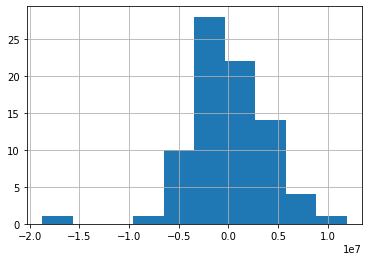

In [56]:
test['VolDiff'].hist()

In [45]:
pd.read_csv('mylist.csv')

,Mylist
0,ALQ.AX
1,BRG.AX
2,DMP.AX
3,GPT.AX
4,IFRA.AX
5,IRE.AX
6,JHG.AX
7,MND.AX
8,PMV.AX
9,REA.AX


ValueError: num must be 1 <= num <= 16, not 17

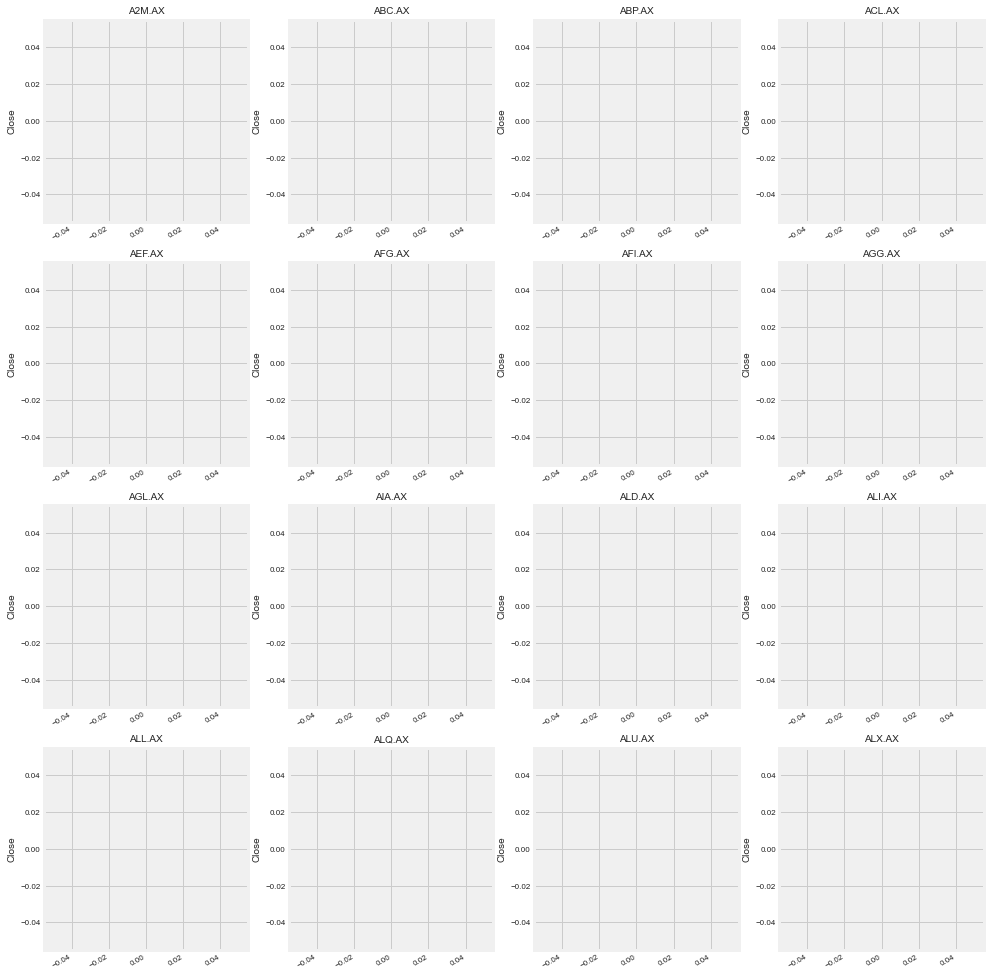

# Enhance current code

In [13]:

    import pandas as pd
    import datetime
    import yfinance as yf

    ############ create a list/string of codes to download from yahoo finance ##############

    mycsv = pd.read_csv('Margin.csv')
    mycsv = mycsv[['ASX Code','Security Name','LVR']]
    mycsv = mycsv.rename(columns = {'ASX Code':'Code'})


    mystock = mycsv['Code']
    # add some more stocks not in the margin list
    mystock = mystock.append(pd.Series(['^AORD','^DJI','^FTSE','CL=F']),ignore_index=True)

    # convert to string to make it better with dowloanding tracker
    mystring = ''
    mylist = []
    for i in mystock:
        if i in ['^AORD','^DJI','^FTSE','CL=F']:     # indexes no need to add .AX
            mystring = mystring + ' ' + i
            mylist.append(i)
        elif i in ['TGG','CCL','BIN','JHC','AHY','RDC','VOC','ALF','MLT','AQR','MHH']:
            # EXCLUDE THE CODES ABOVE SINCE THEY HAVE BEEN DELISTED
            continue
        else:
            mystring = mystring + ' ' + i + '.AX'
            mylist.append(i+'.AX')



    ############ pick up data from yahoo finance (last 120 days) #############################

    start =  datetime.date.today() + datetime.timedelta(days=-120)
    end = datetime.date.today() + datetime.timedelta(days=1)
    data = yf.download(mystring, start=start, end=end, group_by="ticker")



    ######################## create dataframe and export to csv ###############################

    mycol = []
    mytbl = pd.DataFrame(columns=mycol)

    # looping through the list to modify table

    for i in mylist:
        df = data[i]     # new one using Yfinance
        df['Code'] = i
        mytbl = mytbl.append(df)

    # export csv
    mytbl.to_csv("Yahoo.csv")




[*********************100%***********************]  479 of 479 completed


<ipython-input-13-1370c75ed408>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Code'] = i


In [20]:
import matplotlib.pyplot as plt
myshare = mytbl[mytbl['Code']=='^DJI']
myshare = myshare.tail(20)

myshare.dropna(inplace=True)
#plt.plot(myshare['Close'])

In [21]:
myshare

,Open,High,Low,Close,Adj Close,Volume,Code
Date,,,,,,,
2022-04-05,34876.328125,35112.210938,34566.039062,34641.179688,34641.179688,304010000.0,^DJI
2022-04-06,34520.339844,34609.839844,34277.171875,34496.511719,34496.511719,386250000.0,^DJI
2022-04-07,34439.238281,34705.828125,34190.949219,34583.570312,34583.570312,319870000.0,^DJI
2022-04-08,34569.238281,34908.460938,34470.191406,34721.121094,34721.121094,301750000.0,^DJI
2022-04-11,34630.269531,34701.339844,34272.289062,34308.078125,34308.078125,333290000.0,^DJI
2022-04-12,34412.511719,34669.968750,34102.808594,34220.359375,34220.359375,333510000.0,^DJI
2022-04-13,34166.640625,34598.359375,34140.640625,34564.589844,34564.589844,313630000.0,^DJI
2022-04-14,34628.460938,34889.171875,34437.500000,34451.230469,34451.230469,353680000.0,^DJI
2022-04-18,34411.488281,34618.289062,34279.078125,34411.691406,34411.691406,264110000.0,^DJI


In [10]:
import matplotlib.pyplot as plt
myshare = mytbl[mytbl['Code']=='A200.AX']
myshare = myshare.tail(20)

myshare
#plt.plot(myshare['Close'])

,Open,High,Low,Close,Adj Close,Volume,Code
Date,,,,,,,
2022-04-05,128.229996,128.779999,127.800003,128.100006,128.100006,41960.0,A200.AX
2022-04-06,127.110001,127.540001,126.480003,127.400002,127.400002,74420.0,A200.AX
2022-04-07,126.790001,127.019997,126.599998,126.690002,126.690002,28292.0,A200.AX
2022-04-08,127.419998,127.519997,127.000000,127.339996,127.339996,22601.0,A200.AX
2022-04-11,127.610001,128.089996,127.129997,127.480003,127.480003,219784.0,A200.AX
2022-04-12,127.099998,127.410004,126.459999,126.800003,126.800003,61756.0,A200.AX
2022-04-13,127.019997,127.470001,127.019997,127.449997,127.449997,48712.0,A200.AX
2022-04-14,127.580002,128.190002,127.580002,128.080002,128.080002,31269.0,A200.AX
2022-04-18,NaN,NaN,NaN,NaN,NaN,NaN,A200.AX


In [38]:
mystring = 'A2M.AX ABC.AX ABP.AX'
mylist = ['A2M.AX','ABC.AX','ABP.AX']
#^AORD ^DJI ^FTSE CL=F

start =  datetime.date.today() + datetime.timedelta(days=-120)
end = datetime.date.today() + datetime.timedelta(days=1)
data = yf.download(mystring, start=start, end=end, group_by="ticker")


[*********************100%***********************]  3 of 3 completed


In [41]:


######################## create dataframe and export to csv ###############################

mycol = []
mytbl = pd.DataFrame(columns=mycol)

# looping through the list to modify table

for i in mylist:
    df = data[i]     # new one using Yfinance
    df['Code'] = i
    mytbl = mytbl.append(df)

# export csv
mytbl.to_csv("Yahoo.csv")


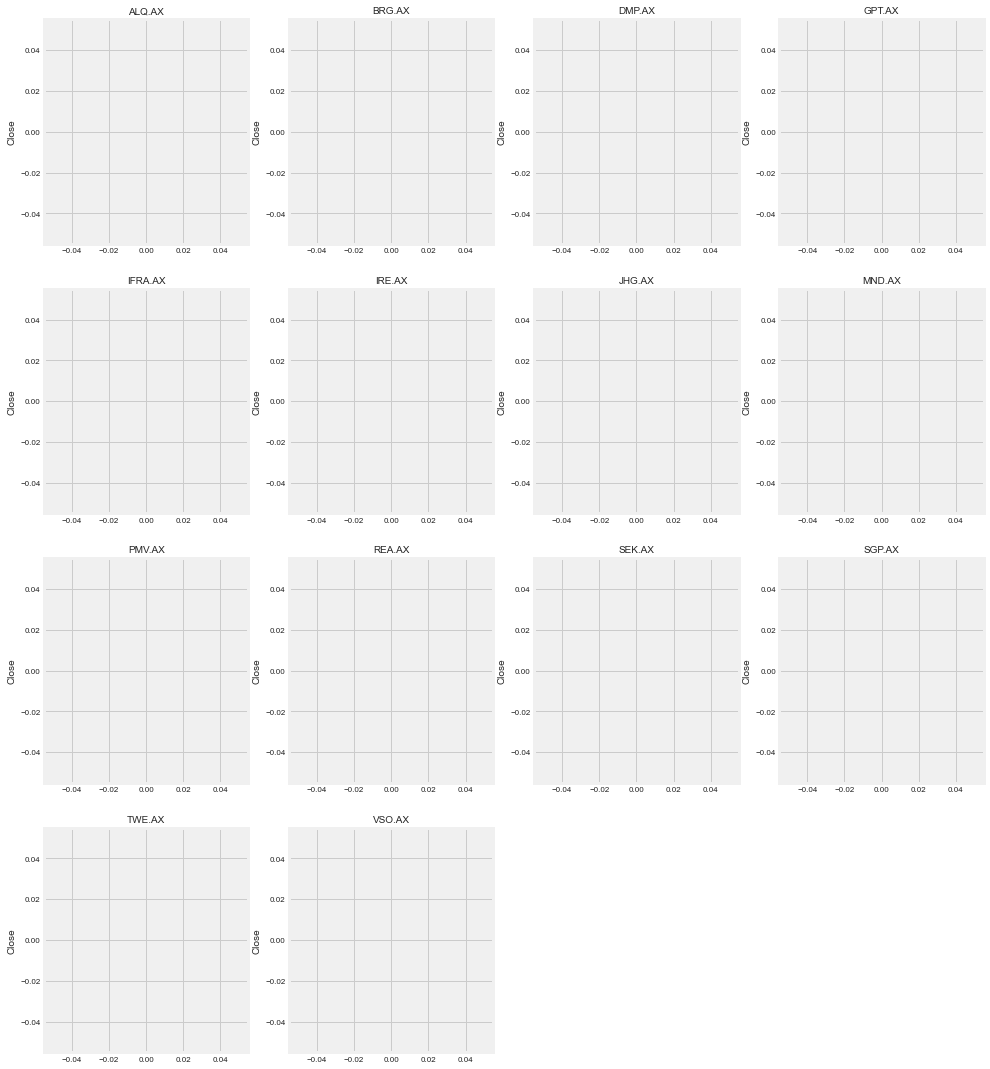

In [42]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
pd.set_option('mode.chained_assignment',None)    # turn off chain error warning since I use loc function properly

# read the original yahoo download from folder
os.chdir(r'C:\Users\r.christianto\MyPython\Yahoo')
df = pd.read_csv('Yahoo.csv')
margin = pd.read_csv('Margin.csv')
margin['Code'] = margin['ASX Code'] + '.AX'


df = pd.merge(df,margin,on='Code',how='left')
df = df.dropna(subset=['LVR'])  # only filter the one with margin 


# create empty dataframe to combine the loop later

final = pd.DataFrame()

# loop all stocks and add new calc
for i in df.Code.unique().tolist():

    new = df[df['Code'] == i]
    new['Max'] = new['Close'].max()
    new['Min'] = new['Close'].min()
    new['DistMin'] = round((new['Close'] - new['Min'])/new['Close'] * 100,2)
    new['DistMax'] = round((new['Close'] - new['Max'])/new['Close'] * 100,2)
    new['Movement'] = new['Close'].diff(1)
    final = final.append(new)
    

# finalise the final dataframe    
final['Date'] = pd.to_datetime(final['Date'])
#mydate = pd.to_datetime(datetime.date.today())
mydate = mydate = max(final['Date'])
final = final[final['Date'] == mydate]


# filter the result, less than 1% (closer to min) and more than 5% below max (potential upside)
# basically you trying to buy cheap to be able to sell later 
final = final[(final['DistMin'] < 1) & (abs(final['DistMax']) > 5) & (final['LVR'] == '65%')]

# produce the list for charting
list = pd.DataFrame({'Mylist':final.Code.unique().tolist()})
#x.to_csv('mylist.csv',index=False)

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

list = pd.read_csv('mylist.csv')['Mylist'].tolist()
mytbl = df


plt.figure(figsize=(15, 19))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, desc in enumerate(list):
    #series = mytbl[mytbl['Code']==list[i]]['Close']    # change the column to vol etc.... 
    #date = mytbl[mytbl['Code']==list[i]]['Date'] 
    plt.subplot(4,4,i+1)
    mytbl[mytbl['Code']==list[i]]['Close'].plot(linewidth = 1)  
    plt.ylabel('Close', fontsize = 10)
    plt.xlabel(None)
    plt.title(f"{list[i]}", fontsize = 10)
    plt.yticks(fontsize = 8)
    plt.xticks(fontsize = 8)

In [30]:
mystring

' A2M.AX ABC.AX ABP.AX ACL.AX AEF.AX AFG.AX AFI.AX AGG.AX AGL.AX AIA.AX ALD.AX ALI.AX ALL.AX ALQ.AX ALU.AX ALX.AX AMC.AX AMH.AX AMI.AX AMP.AX AMPPB.AX ANN.AX ANZ.AX ANZPF.AX ANZPG.AX ANZPH.AX ANZPI.AX ANZPJ.AX APA.AX APE.AX APM.AX APX.AX ARB.AX ARF.AX ARG.AX ASB.AX ASX.AX AUB.AX AUI.AX AVJ.AX AWC.AX AX1.AX AZJ.AX BAP.AX BBN.AX BEN.AX BENPG.AX BENPH.AX BFG.AX BGA.AX BHP.AX BKI.AX BKL.AX BKW.AX BLD.AX BLX.AX BOQ.AX BOQPE.AX BOQPF.AX BPT.AX BRG.AX BSL.AX BST.AX BVS.AX BWP.AX BWX.AX BXB.AX C2FHA.AX CAJ.AX CAR.AX CBA.AX CBAPD.AX CBAPG.AX CBAPH.AX CBAPI.AX CBAPJ.AX CBAPK.AX CCP.AX CCX.AX CDA.AX CDP.AX CGC.AX CGF.AX CGFPB.AX CGFPC.AX CHC.AX CIA.AX CIM.AX CIN.AX CIP.AX CKF.AX CLW.AX CMW.AX KMD.AX KSL.AX LIC.AX LLC.AX LNK.AX LOV.AX LYC.AX MCP.AX MEZ.AX MFF.AX MFG.AX MGR.AX MIN.AX MIR.AX MBLPC.AX MBLPD.AX MGX.AX MLD.AX MMS.AX MND.AX MNY.AX MPL.AX MQG.AX MQGPC.AX MQGPD.AX MQGPE.AX MTS.AX MVF.AX MVP.AX MYS.AX NAB.AX NABPD.AX NABPE.AX NABPF.AX NABPH.AX NAN.AX NCK.AX NCM.AX NEC.AX NFNG.AX NGI.AX NHC

In [123]:

df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
df['Diff'] = df['Close'].diff(1)
test = df[df['Code'] == 'CSL.AX']

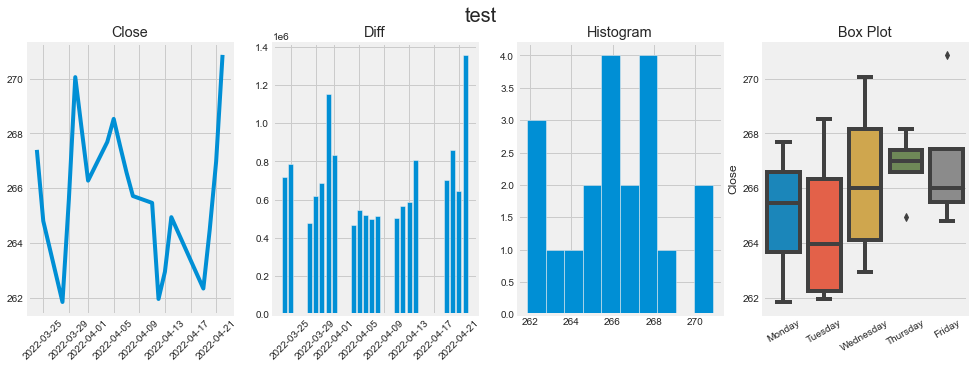

In [124]:
    plt.figure(figsize=(15, 5))
    plt.suptitle('test',fontsize=20)

    plt.subplot(1,4,1)
    plt.plot(test['Date'],test['Close'])
    plt.xticks(rotation=45)
    plt.title('Close')

    plt.subplot(1,4,2)
    plt.bar(test['Date'],test['Volume'])
    plt.xticks(rotation=45)
    plt.title('Diff')

    plt.subplot(1,4,3)
    test['Close'].hist()
    plt.title('Histogram')

    plt.subplot(1,4,4)
    import seaborn as sns
    order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday']
    ax = sns.boxplot(x=test['Day'],y=test['Close'],order=order,data=final)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_xlabel(None)
    ax.set_title('Box Plot')


    plt.show()

In [22]:
list = [1,2,3,4,5]
list[:4]

[1, 2, 3, 4]